In [54]:
import tensorflow as tf
tf.enable_eager_execution()

In [ ]:
# 变量
x = 0
x = 3

In [12]:
# 函数
def f( ):
    return  

In [143]:
# 计数方法 f
def f(x):
    # tf 内置加法
    y = tf.add(x, 1)
    return y
print(f(3))
# 使用.numpy()方法 将 tensor 类型变成 numpy
print(f(3).numpy())

tf.Tensor(4, shape=(), dtype=int32)
4


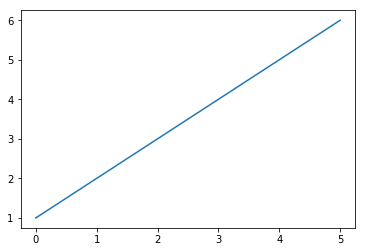

In [144]:
# 导入画图库包
import matplotlib.pyplot as plt
import numpy as np
x = tf.range(6) # tf 内置方法
y = f(x)
plt.plot(x,y)

In [62]:
# x 从 0 一直循环 6 次（到 5 停止）
for x in range(6):
    x = f(x)
print(x)

tf.Tensor(6, shape=(), dtype=int32)


w = 2 
x = 3
y = 6


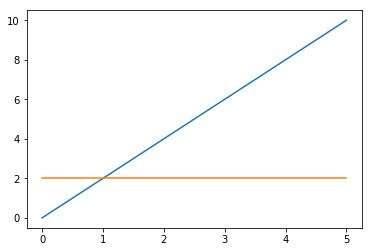

In [164]:
# 累积速度
# 这里 g 返回的累积速度永远不变，是线性的
def g(x):
    w = 2
    return w 

# 累积量
def f(x,w):
    y = w*x
    return y
    
print('w = %s ' %(g(3)))
print('x = 3\ny = %s' %f(3,g(x)))

x = tf.range(6)
y = f(x,g(3))
w = [g(x)]*6
# 画图
plt.plot(x,y)
plt.plot(x,w)

In [165]:
# 两个因素累积一个因素
def f(x1,x2,w1,w2):
    y = w1*x1 + w2*x2
    return y

print(f(3,2,4,2))

16


In [166]:
# 使用向量来表示
import numpy as np
w = np.array([4,2]) # list 的定义方法，x = [元素，元素，元素，...]，随后变成 np.array 类型便于使用矩阵和向量的操作
def f(x,w):
    b = -1
    y = np.matmul(x,w) + b
    return y

print(f([3,2],w))

15


In [172]:
W = np.array([[4,2],[2,2]]) #矩阵的定义方法，list 的内的元素也是等长的 list，x = [list，list，list，...]
b = np.array([-1,-1])
# 定义拥有属性和方法的类
# 把参数 W 和 b 封装在类的内部，成为类的属性

class F(object):
    def __init__(self,W,b):
        # 参数
        # 给 参数 W 和 b 两个值
        self.W = W
        self.b = b
    
    def __call__(self, x):
        # 正向传递：如何利用 参数 W 和 b 运算
        # x 放在前面
        y = np.matmul(x, self.W) + self.b
        return y
# 实例化 F 成 f
# 这样每次都可以控制实例化时每个 f 内部的 W 和 b
f = F(W,b)

print(f([3,2]))

[15  9]


In [169]:
# 批量多因素累积多因素
tfe = tf.contrib.eager
class F(object):
    def __init__(self):
        # 使用 tfe.Variable 来定义参数，用来与 tensorflow 对接
        self.W = tfe.Variable([[4,2],[2,2]])
        self.b = tfe.Variable([-1,-1])
    
    def __call__(self, x):
        # 正向传递：如何利用 参数 W 和 b 运算
        y = tf.matmul(x, self.W) + self.b
        return y
# 实例化 f
f = F()

print(f([[3,2],[4,1]]))

tf.Tensor(
[[15  9]
 [17  9]], shape=(2, 2), dtype=int32)


In [170]:
# 定义函数
def f(x):
    # y = x1^2 + x2^3
    return x[0]**2+x[1]**3
# 函数的导数
grad_f = tfe.gradients_function(f)
x = np.array([1,2],dtype='float32') # 导数需要极限，所以 int 这种不连续的类型无法使用，需要定义成 float型。
grad_f(x)[0].numpy()

array([ 2., 12.], dtype=float32)

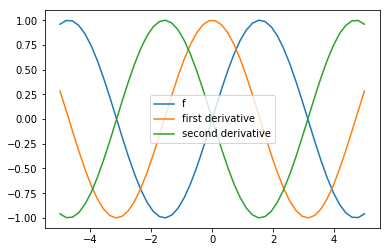

In [180]:
def f(x):
    return tf.sin(x)

# 高阶求导
def grad(f):
    return lambda x: tfe.gradients_function(f)(x)[0]

x = tf.linspace(-5.0, 5.0, 50)
plt.plot(x, f(x), label="f")
plt.plot(x, grad(f)(x), label="first derivative")
plt.plot(x, grad(grad(f))(x), label="second derivative")
plt.legend()
plt.show()